# Understanding the problem statement
We need to make a sms spam detection model which can warn user about the incoming spam sms.

### Importing the libraries and dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
sms_df = pd.read_csv('/content/spam.csv', encoding='latin-1')

In [3]:
sms_df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2172,ham,Yavnt tried yet and never played original either,NaN,NaN,NaN
5105,ham,I wnt to buy a BMW car urgently..its vry urgen...,NaN,NaN,NaN
1909,ham,Then u going ikea str aft dat?,NaN,NaN,NaN
5549,ham,"You know, wot people wear. T shirts, jumpers, ...",NaN,NaN,NaN
2903,ham,HI DARLIN I HOPE YOU HAD A NICE NIGHT I WISH I...,NaN,NaN,NaN


In [4]:
sms_df.shape

(5572, 5)

## Steps to perform
- Data cleaning
- EDA
- Text preprocessing
- Model building
- Model evaluation
- deployment

###DATA CLEANING

In [5]:
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
sms_df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [7]:
sms_df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
# renaming the columns
df = sms_df.rename(columns={'v1':'target','v2':'text'})

In [9]:
df.sample(5)

,target,text
5155,ham,MY NEW YEARS EVE WAS OK. I WENT TO A PARTY WIT...
1504,ham,Oh my God. I'm almost home
2773,spam,How come it takes so little time for a child w...
25,ham,Just forced myself to eat a slice. I'm really ...
2307,spam,WIN a year supply of CDs 4 a store of ur choic...


In [10]:
df.shape

(5572, 2)

In [11]:
# assigning the labelencoder
encoder = LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
# checking for missing and duplicated values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

###EDA

In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

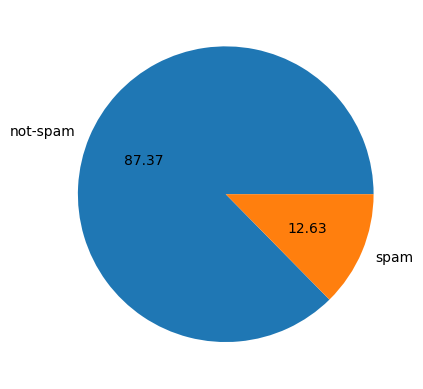

In [19]:
plt.pie(df['target'].value_counts(),labels=['not-spam','spam',], autopct='%.2f')
plt.show()

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
df['num_characters']=df['text'].apply(len)

In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [29]:
df[df['target']==0].describe()

,target,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [30]:
df[df['target']==1].describe()

,target,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


<function matplotlib.pyplot.show(close=None, block=None)>

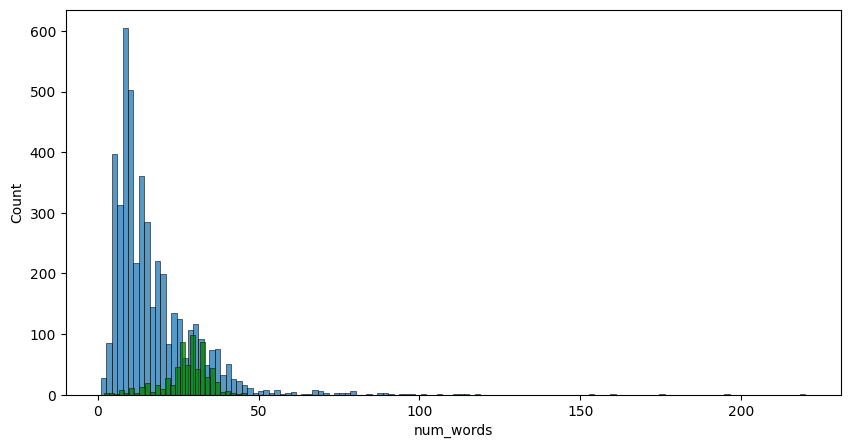

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='green')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

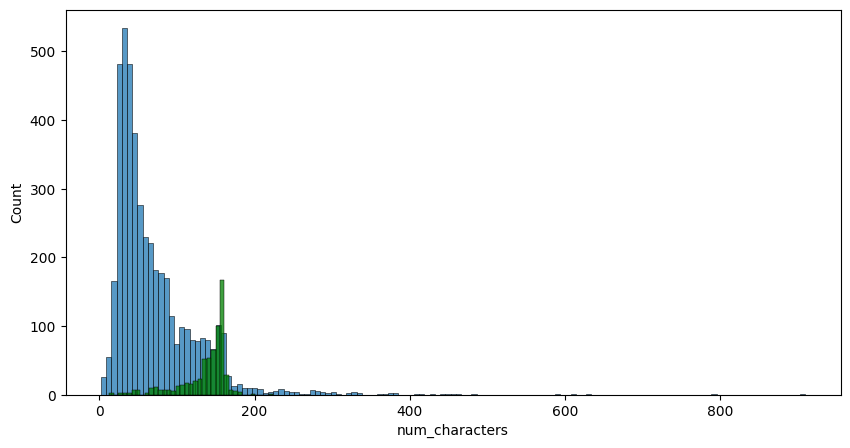

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='green')
plt.show

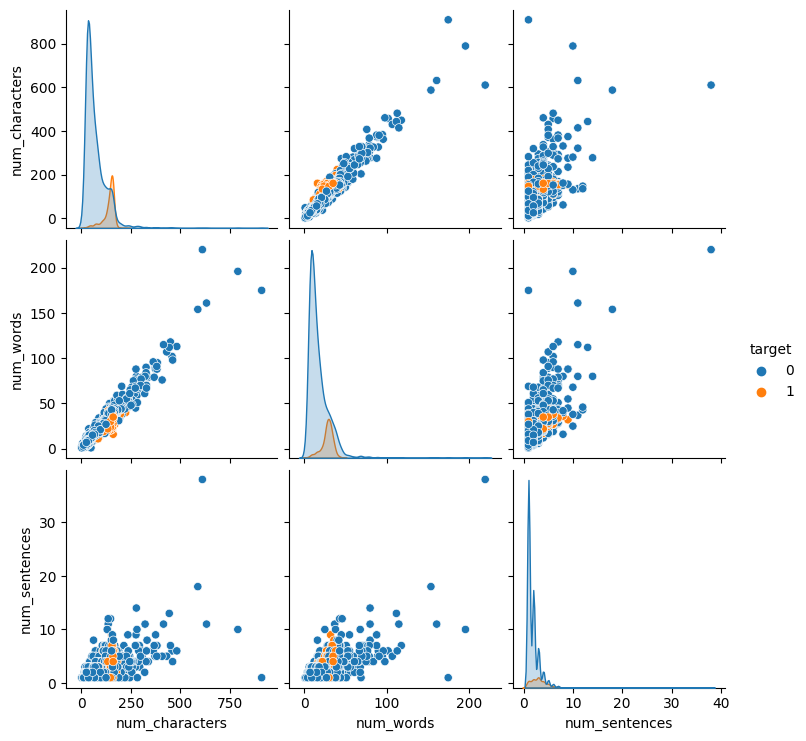

In [33]:
sns.pairplot(df, hue='target')

<ipython-input-34-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

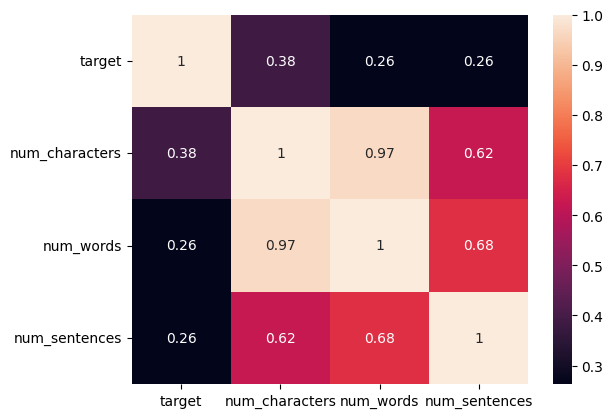

In [34]:
sns.heatmap(df.corr(), annot=True)

### Data Preprocessing
1. Lowercase
2. Tokenization
3. Removing special characters/ stop words/ punctuation
4. Stemming
-NOTE - These are the steps in-sequence

In [35]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [38]:
def preprocessed_text(text):
  text = text.lower() # lower case
  text = nltk.word_tokenize(text) # word tokenizaztion

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [39]:
df['transformed_text']=df['text'].apply(preprocessed_text)

In [40]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='white')

In [41]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

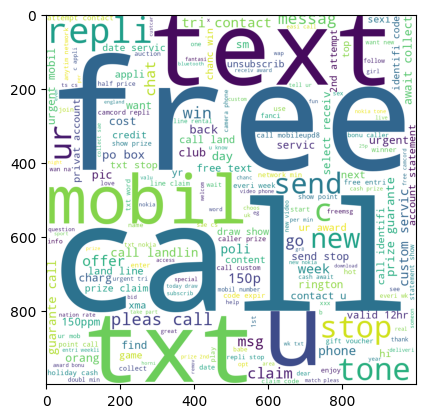

In [42]:
plt.imshow(spam_wc)

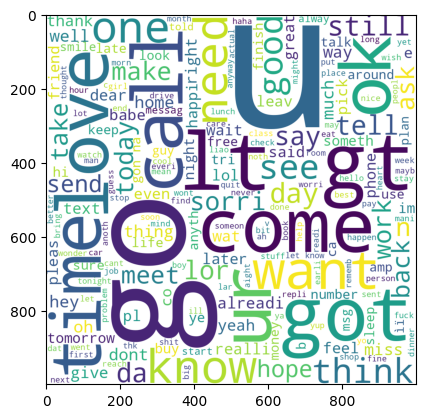

In [43]:
not_spam_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(not_spam_wc)

In [44]:
# Top 30 words in spam and not spam
spam_corpus = []
for i in df[df['target']==1]['transformed_text'].tolist():
  for word in i.split():
    spam_corpus.append(word)


In [45]:
len(spam_corpus)

9939

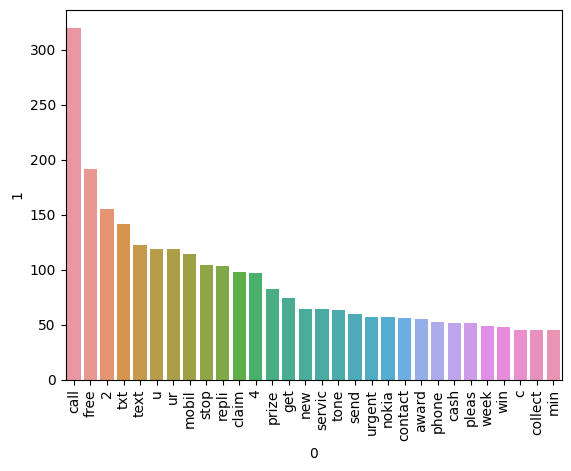

In [47]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [48]:
not_spam_corpus = []
for i in df[df['target']==0]['transformed_text'].tolist():
  for word in i.split():
    not_spam_corpus.append(word)


In [49]:
len(not_spam_corpus)

35404

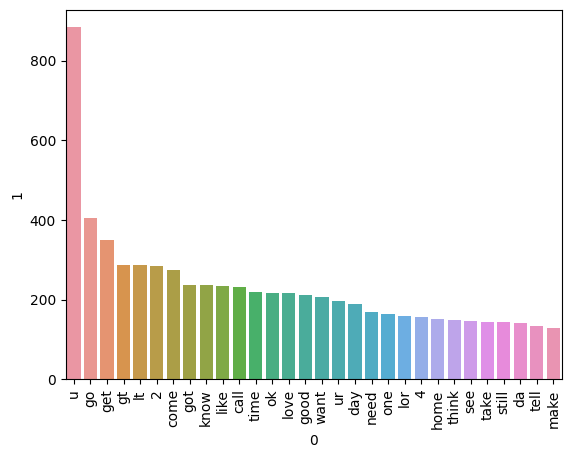

In [50]:
sns.barplot(x=pd.DataFrame(Counter(not_spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(not_spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### Model Building

In [102]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [103]:
cv = CountVectorizer()
tfidf=TfidfVectorizer()

In [104]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [105]:
X.shape

(5169, 6708)

In [106]:
y=df['target'].values

In [107]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=2)

In [114]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [115]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [116]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [117]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [63]:
# with tfidf
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [64]:
X.shape

(5169, 6708)

In [65]:
y=df['target'].values

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=2)

In [67]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [68]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [69]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [70]:
# Training multiple models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [82]:
svc = SVC(kernel='sigmoid', gamma=1)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver='liblinear' , penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [83]:
clfs = {
    'SVC':svc,
    'KN':knc,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [84]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)

  return accuracy,precision

In [88]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

  print('for ',name)
  print('Accuracy - ',current_accuracy)
  print('Precision - ',current_precision)
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)


for  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
for  KN
Accuracy -  0.9003868471953579
Precision -  1.0
for  DT
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461
for  LR
Accuracy -  0.9516441005802708
Precision -  0.94
for  RF
Accuracy -  0.971953578336557
Precision -  1.0
for  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
for  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
for  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
for  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
for  xgb
Accuracy -  0.9729206963249516
Precision -  0.9435483870967742


In [91]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision', ascending=False)

In [92]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
4,RF,0.971954,1.000000
7,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
5,AdaBoost,0.961315,0.945455
9,xgb,0.972921,0.943548
3,LR,0.951644,0.940000
8,GBDT,0.952611,0.923810
6,BgC,0.958414,0.862595
2,DT,0.936170,0.846154


In [95]:
# Bulding voting classifier from top performing algorithums
svc = SVC(kernel='sigmoid', gamma=1, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier

In [96]:
voting = VotingClassifier(estimators= [('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [97]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1, kernel='sigmoid', probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [98]:
y_pred = voting.predict(X_test)
print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision',precision_score(y_test,y_pred))


Accuracy 0.9787234042553191
Precision 1.0


In [100]:
# We can try stacking with top performing models
''' from sklearn.ensemble import StackingClassifier
    estimators=[('svm',svc),('nb',mnb),('et',etc)]
    final_estimator = RandomForestClassifier()
    clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy - ',accuracy_score(y_test,y_pred))
    print('Precision - ',precision_score(y_test,y_pred))'''

" from sklearn.ensemble import StackingClassifier\n    estimators=[('svm',svc),('nb',mnb),('et',etc)]\n    final_estimator = RandomForestClassifier()\n    clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)\n    clf.fit(X_train,y_train)\n    y_pred = clf.predict(X_test)\n    print('Accuracy - ',accuracy_score(y_test,y_pred))\n    print('Precision - ',precision_score(y_test,y_pred))"

In [101]:
# so from our observation we are getting best results from multinomial Naivebase

# now when when we will get a new sms our task will be to
#   1. do preprocessing
#   2. text vectorization
#   3. model execution

In [119]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))